# **Intelligence Artificielle - TP initiation**

<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

Nous allons travailler sur des données disponibles publiquement en ligne pour explorer l'apprentissage automatique (machine learning). 
Les données correspondent à des mesures sur des images cytologiques obtenues à partir d'une aspiration avec une aiguille fine à partir de masses détectées dans le sein de patientes. La but est donc de prédire si ces masses sont bénignes ou malignes (ie cancers du sein). 

Exemple d'images utilisées : 

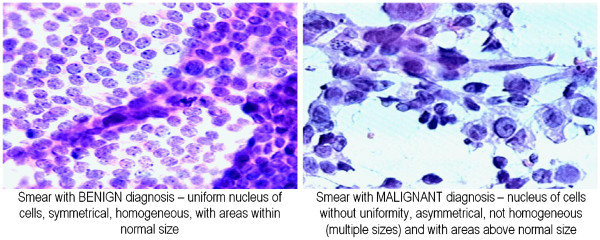

Un système automatisé d'analyse d'images a permis d'extraire des paramêtres numériques et ce sont ceux ci que nous allons utilisés. 

Vous aurez au cours de ce TP 3 questions (cadre orange) pour lesquelles les réponses sont attendues sur moodle (Quiz intro IA) et qui serviront dans le cadre de votre évaluation pour cet UE3 (contrôle continue). 


**Plan du TP :**

**I. Load Data**  
**II. Explore Data**  
**III. Decision Tree**  
**IV. Random Forest**

**Conclusion**



## I - Load Data

Nous allons tout d'abord charger les données sous forme d'un tableau (les titres des colonnes sont dans un fichier séparé). 

In [1]:
# 1- Load necessary tools
library(ggplot2)
library(tidyr)
library(caret)
library(corrplot)
library(dplyr)
library(rpart)
library(rpart.plot)

Loading required package: lattice

Warning message:
“Failed to locate timezone database”
corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# 2- Load data (csv and txt files) in dataframe called breastCancerData and breastCancerDataColNames with read.table()
breastCancerData = read.table("DataBreastCancerWisconsin.csv", sep=",")
breastCancerDataColNames = read.table("NamesBreastCancerWisconsin.txt", sep="\n")

In [3]:
# 3- Visualiser les premières lignes de vos données
head(breastCancerData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# 4- Visualiser les noms de colonnes
breastCancerDataColNames

V1
<chr>
ID
Diagnosis
Radius.Mean
Texture.Mean
Perimeter.Mean
Area.Mean
Smoothness.Mean
Compactness.Mean
Concavity.Mean


In [5]:
# 5- Ajouter le nom des colonnes à votre dataframe breastCancerData
colnames(breastCancerData) = breastCancerDataColNames[,]

In [6]:
# 6- Quelles sont les dimensions de votre dataframe breastCancerData ?
dim(breastCancerData)

[1] 569  32

In [7]:
# 7- Combien avez vous de patientes avec un diagnostic "B" (benin) ?
sum(breastCancerData$Diagnosis=='B')

[1] 357

In [8]:
# 8- Combien avez vous de patientes avec un diagnostic de tumeur maligne "M" ?
length(breastCancerData[which(breastCancerData$Diagnosis=="M"),1])
# or
sum(breastCancerData$Diagnosis=='M')

[1] 212

[1] 212

<div class="alert alert-warning"> 
    Ceci doit être la réponse au 1er quizz sur le moodle (nombre de patientes avec une tumeur maligne)
</div>

In [9]:
# 9- Faites du diagnostic un facteur
breastCancerData$Diagnosis <- as.factor(breastCancerData$Diagnosis)

In [10]:
# 10- Mettez le numéro d'identification des patientes en rownames et retirez la colonne correspondante du tableau
rownames(breastCancerData)=breastCancerData[,1]
breastCancerData <- breastCancerData[2:ncol(breastCancerData)]

In [11]:
# 11- Visualiser les premières lignes de vos données
head(breastCancerData)

,Diagnosis,Radius.Mean,Texture.Mean,Perimeter.Mean,Area.Mean,Smoothness.Mean,Compactness.Mean,Concavity.Mean,Concave.Points.Mean,Symmetry.Mean,⋯,Radius.Worst,Texture.Worst,Perimeter.Worst,Area.Worst,Smoothness.Worst,Compactness.Worst,Concavity.Worst,Concave.Points.Worst,Symmetry.Worst,Fractal.Dimension.Worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# II - Explorer les données

Nous allons maintenant regarder les données d'un peu plus près pour nous familiariser avec elles et potentiellement décider lesquelles sont les plus pertinentes. 

In [12]:
# 12- Explorer les données avec summary()
summary(breastCancerData)

 Diagnosis  Radius.Mean      Texture.Mean   Perimeter.Mean     Area.Mean     
 B:357     Min.   : 6.981   Min.   : 9.71   Min.   : 43.79   Min.   : 143.5  
 M:212     1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17   1st Qu.: 420.3  
           Median :13.370   Median :18.84   Median : 86.24   Median : 551.1  
           Mean   :14.127   Mean   :19.29   Mean   : 91.97   Mean   : 654.9  
           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10   3rd Qu.: 782.7  
           Max.   :28.110   Max.   :39.28   Max.   :188.50   Max.   :2501.0  
 Smoothness.Mean   Compactness.Mean  Concavity.Mean    Concave.Points.Mean
 Min.   :0.05263   Min.   :0.01938   Min.   :0.00000   Min.   :0.00000    
 1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956   1st Qu.:0.02031    
 Median :0.09587   Median :0.09263   Median :0.06154   Median :0.03350    
 Mean   :0.09636   Mean   :0.10434   Mean   :0.08880   Mean   :0.04892    
 3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070   3rd Qu.:0.07400    
 Max

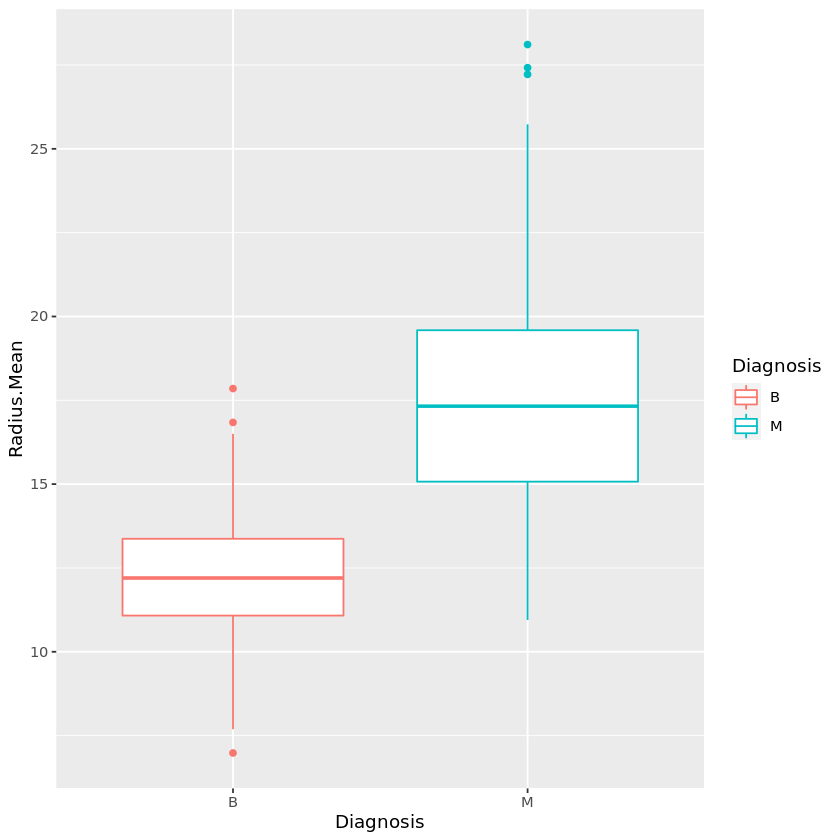

In [13]:
# 13- Faire un boxplot avec le paramêtre Radius.Mean pour comparer les B et les M
ggplot(breastCancerData, aes(Diagnosis, Radius.Mean, color = Diagnosis)) + geom_boxplot()

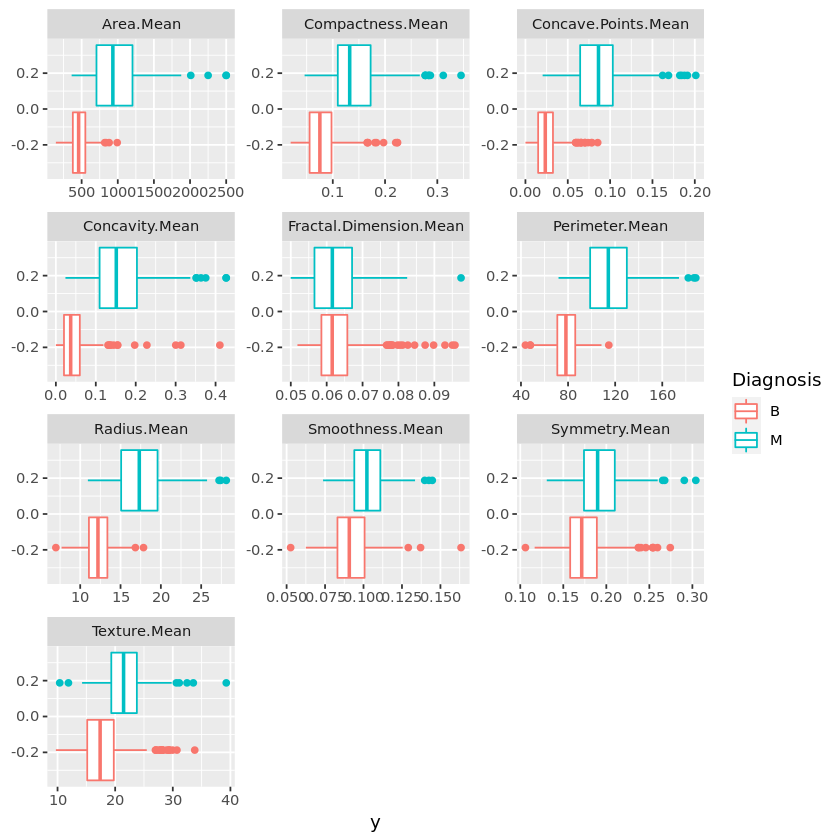

In [14]:
# 14- Visualiser plusieurs boxplot d'un coup (les colonnes avec des moyennes "mean")
gather(breastCancerData, x, y, Radius.Mean:Fractal.Dimension.Mean) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

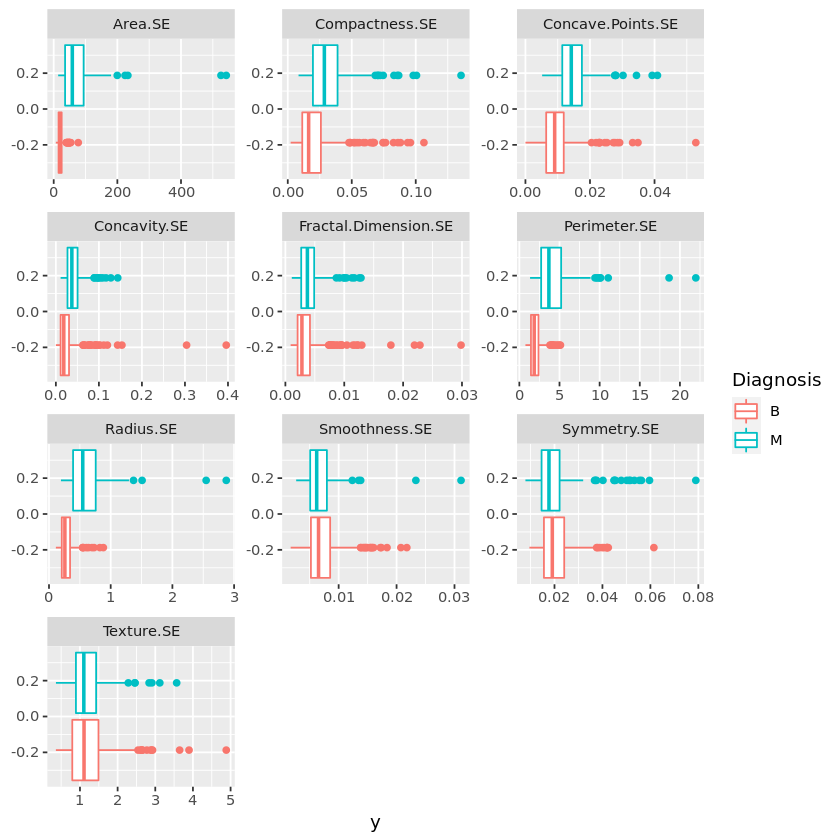

In [15]:
# 15- Visualiser plusieurs boxplot d'un coup (les colonnes avec des ecarts types "SE")
gather(breastCancerData, x, y, Radius.SE:Fractal.Dimension.SE) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

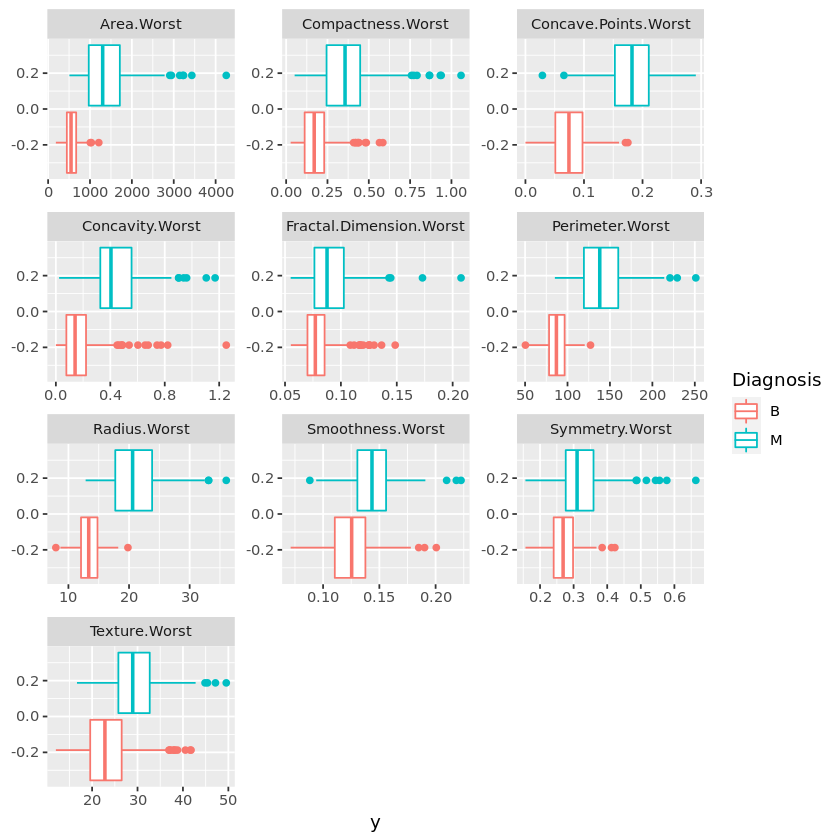

In [16]:
# 16- Visualiser plusieurs boxplot d'un coup (les colonnes avec pires valeurs "Worst")
gather(breastCancerData, x, y, Radius.Worst:Fractal.Dimension.Worst) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [17]:
# 17- Center & scale data
ppv <- preProcess(breastCancerData, method = c("center", "scale"))
breastCancerData_tr <- predict(ppv, breastCancerData)

In [18]:
# 18- Summarize first 5 columns of the original data
breastCancerData[1:5] %>% summary()

 Diagnosis  Radius.Mean      Texture.Mean   Perimeter.Mean     Area.Mean     
 B:357     Min.   : 6.981   Min.   : 9.71   Min.   : 43.79   Min.   : 143.5  
 M:212     1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17   1st Qu.: 420.3  
           Median :13.370   Median :18.84   Median : 86.24   Median : 551.1  
           Mean   :14.127   Mean   :19.29   Mean   : 91.97   Mean   : 654.9  
           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10   3rd Qu.: 782.7  
           Max.   :28.110   Max.   :39.28   Max.   :188.50   Max.   :2501.0  

In [19]:
# 19- Summarize first 5 columns of the re-centered and scaled data
breastCancerData_tr[1:5] %>% summary()

 Diagnosis  Radius.Mean       Texture.Mean     Perimeter.Mean   
 B:357     Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 M:212     1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
           Median :-0.2149   Median :-0.1045   Median :-0.2358  
           Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
           3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
           Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  
   Area.Mean      
 Min.   :-1.4532  
 1st Qu.:-0.6666  
 Median :-0.2949  
 Mean   : 0.0000  
 3rd Qu.: 0.3632  
 Max.   : 5.2459  

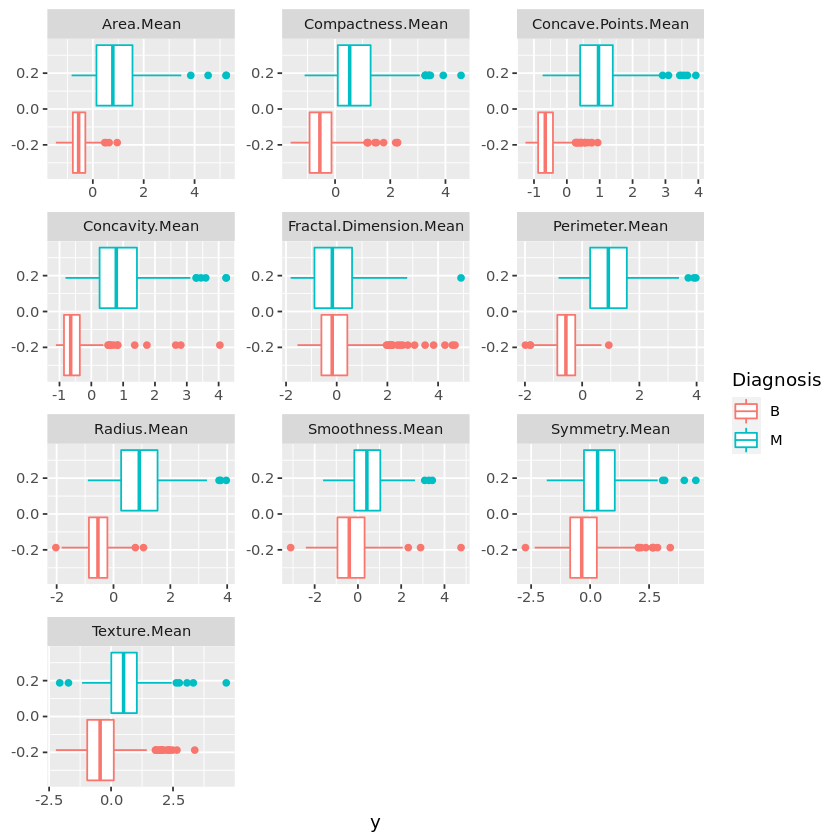

In [20]:
# 20- Visualiser à nouveau plusieurs boxplot d'un coup à partir des données centrées
gather(breastCancerData_tr, x, y, Radius.Mean:Fractal.Dimension.Mean) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

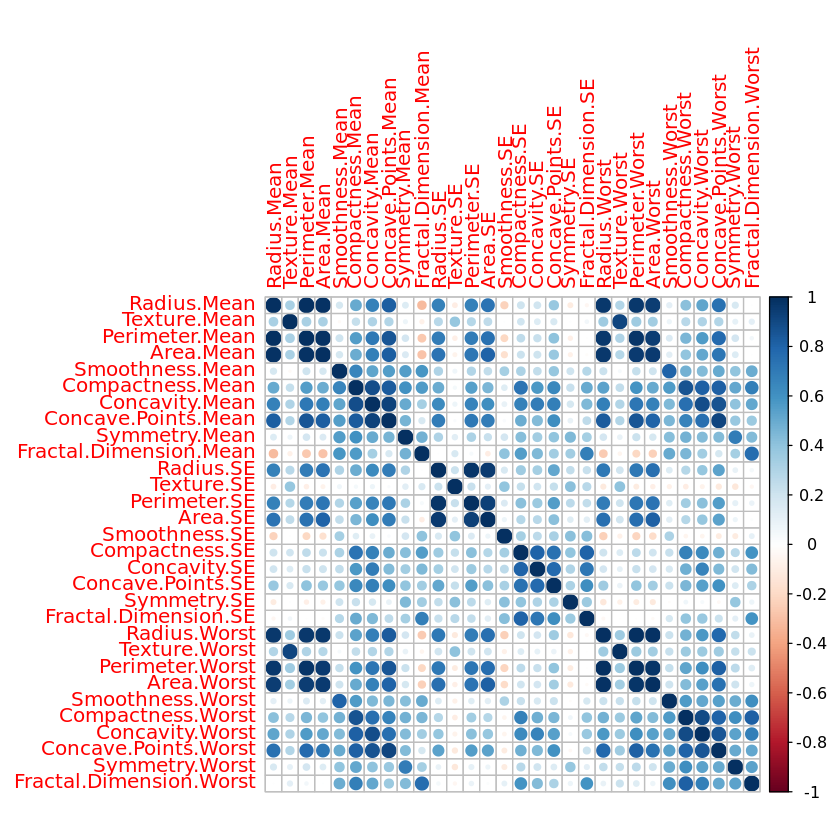

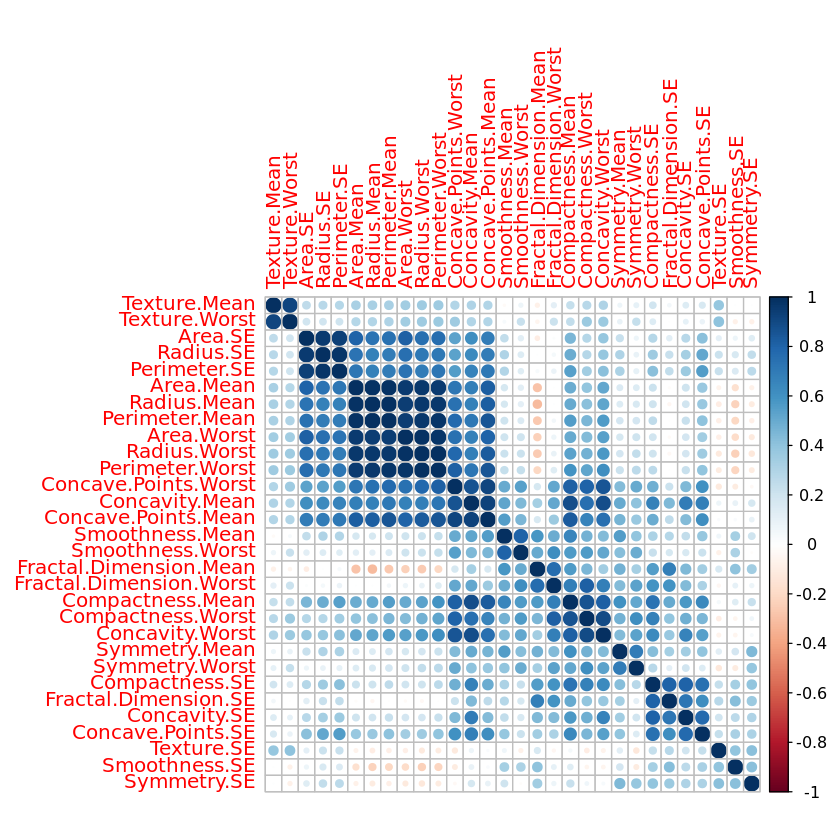

In [21]:
# 21- vérifier si les variables sont fortement corrélées entre elles
# calculate correlation matrix avec cor() 
corMatrix <- cor(breastCancerData[, -1])
# calculate correlation matrix avec corrplot() 
corrplot(corMatrix)
# calculate correlation matrix avec corrplot() et l'option order hclust
corrplot(corMatrix, order = "hclust")

In [22]:
# 22- Faire des tests statistiques pour voir les paramêtres les plus prometteurs
# exemple pour la colonne Radius.Mean
t.test(Radius.Mean ~ Diagnosis, data=breastCancerData)$p.value
# stocker les p-val pour chacun des 30 paramêtres dans une variable nommée ttests (utiliser la fonction lapply)
ttests=lapply(breastCancerData[-1], function(x) t.test(x ~ breastCancerData$Diagnosis)$p.value)
ttests

[1] 1.684459e-64

$Radius.Mean
[1] 1.684459e-64

$Texture.Mean
[1] 3.019055e-25

$Perimeter.Mean
[1] 1.023141e-66

$Area.Mean
[1] 3.284366e-52

$Smoothness.Mean
[1] 5.573331e-19

$Compactness.Mean
[1] 9.607863e-42

$Concavity.Mean
[1] 3.742121e-58

$Concave.Points.Mean
[1] 3.127316e-71

$Symmetry.Mean
[1] 5.957651e-15

$Fractal.Dimension.Mean
[1] 0.7667216

$Radius.SE
[1] 1.491133e-30

$Texture.SE
[1] 0.8354171

$Perimeter.SE
[1] 6.868553e-29

$Area.SE
[1] 2.983568e-26

$Smoothness.SE
[1] 0.105297

$Compactness.SE
[1] 6.341807e-12

$Concavity.SE
[1] 1.266514e-11

$Concave.Points.SE
[1] 4.042197e-24

$Symmetry.SE
[1] 0.8871223

$Fractal.Dimension.SE
[1] 0.04220238

$Radius.Worst
[1] 3.556557e-71

$Texture.Worst
[1] 5.198708e-30

$Perimeter.Worst
[1] 1.03273e-72

$Area.Worst
[1] 4.937924e-54

$Smoothness.Worst
[1] 3.474376e-24

$Compactness.Worst
[1] 1.749835e-38

$Concavity.Worst
[1] 9.852484e-59

$Concave.Points.Worst
[1] 1.061454e-96

$Symmetry.Worst
[1] 6.562499e-19

$Fractal.Dimension.Worst
[1] 2.041904e-12

# III - Decision Tree

In [23]:
# 23- split into training and test subsets
set.seed(1000)
ind <- sample(2, nrow(breastCancerData), replace=TRUE, prob=c(0.7, 0.3))
breastCancerData.train <- breastCancerData[ind==1,]
breastCancerData.test <- breastCancerData[ind==2,]

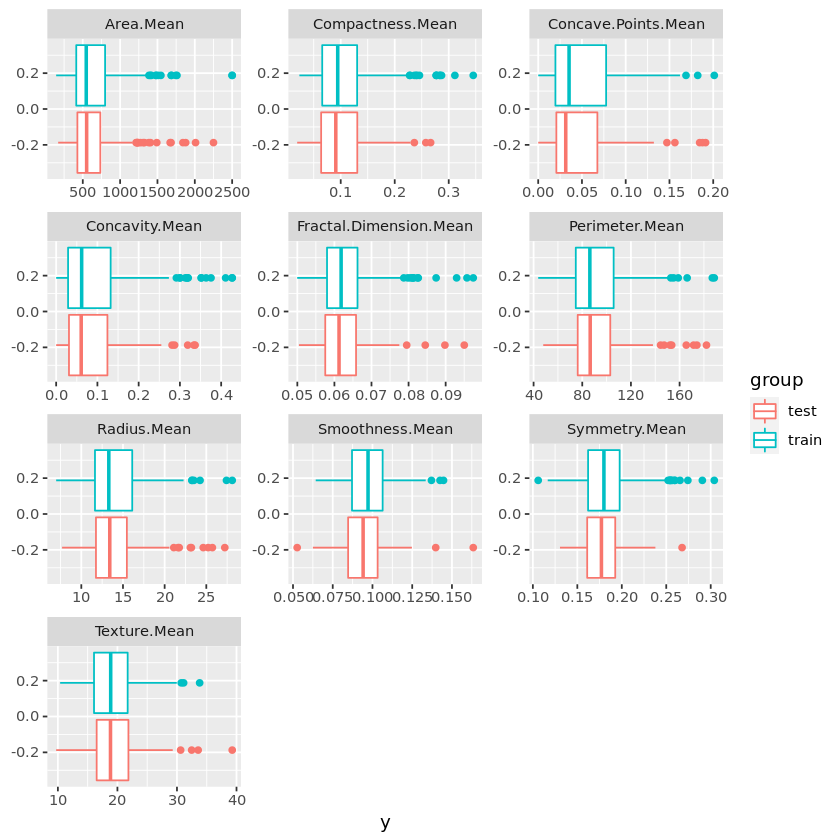

In [24]:
# 24- vérifier que les 2 sets sont comparables
bind_rows(data.frame(group = "train", breastCancerData.train),
      data.frame(group = "test", breastCancerData.test)) %>%
  gather(x, y, Radius.Mean:Fractal.Dimension.Mean) %>%
  ggplot(aes(x = y, color = group)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

           CP nsplit rel error    xerror       xstd
1  0.69594595      0 1.0000000 1.0000000 0.06469979
2  0.04054054      1 0.3040541 0.3986486 0.04780204
3  0.01013514      3 0.2229730 0.3243243 0.04382897
4  0.00000000      5 0.2027027 0.3040541 0.04262349
5 -1.00000000      7 0.2027027 0.3040541 0.04262349


   
      B   M
  B 228  17
  M  13 131

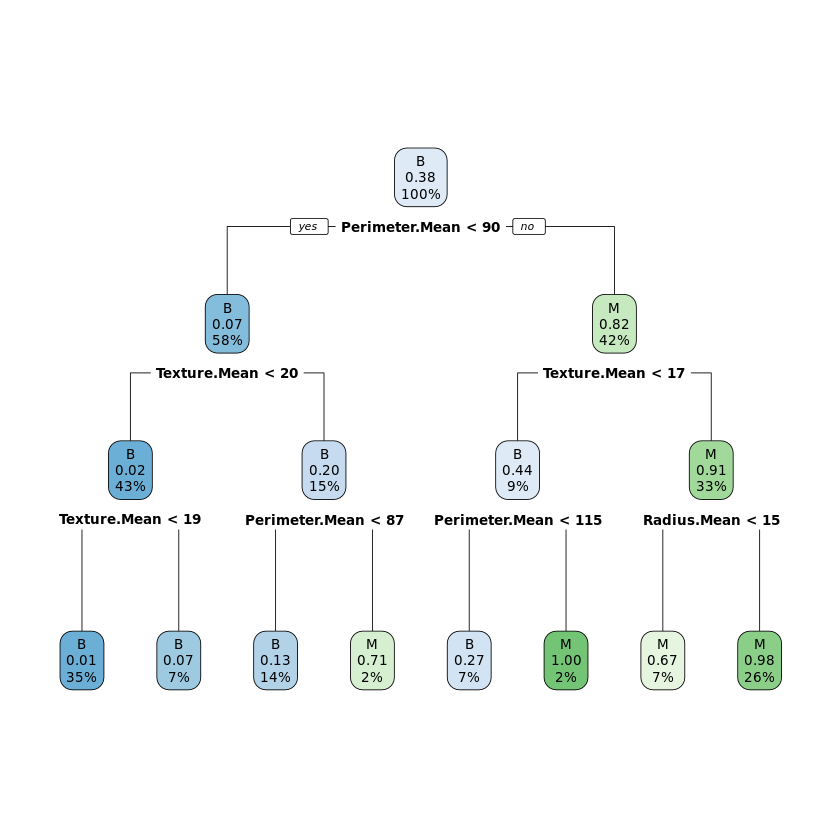

In [25]:
# 25- Construire un modèle avec 3 paramètres
myFormula <- Diagnosis ~ Radius.Mean + Texture.Mean + Perimeter.Mean

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively (the larger its value, the more probable to apply pruning to the tree)


print(breastCancerData.model$cptable)
rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)


<div class="alert alert-warning"> 
    2ème quizz sur le moodle : combien y a-t-il d'erreurs (faux positifs + faux négatifs) avec ce modèle sur le dataset d'entrainement (training set) ? 
</div>

4 
4

   
      B   M
  B 228  17
  M  13 131

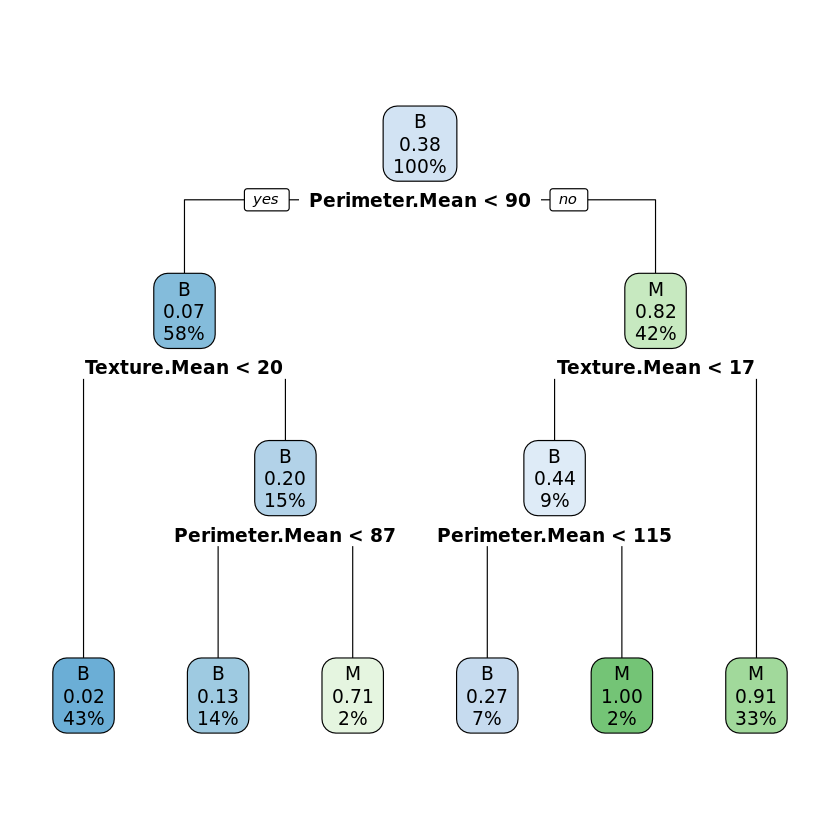

In [26]:
# 26- simplifier ce modèle en modifiant le cp (prendre le cp otimal = min with xerror)
opt <- which.min(breastCancerData.model$cptable[, "xerror"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
# prune tree
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
# plot tree
rpart.plot(breastCancerData.pruned.model)

table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)

                 
BreastCancer_pred   B   M
                B 106   7
                M  10  57

                 
BreastCancer_pred   B   M
                B 106   7
                M  10  57

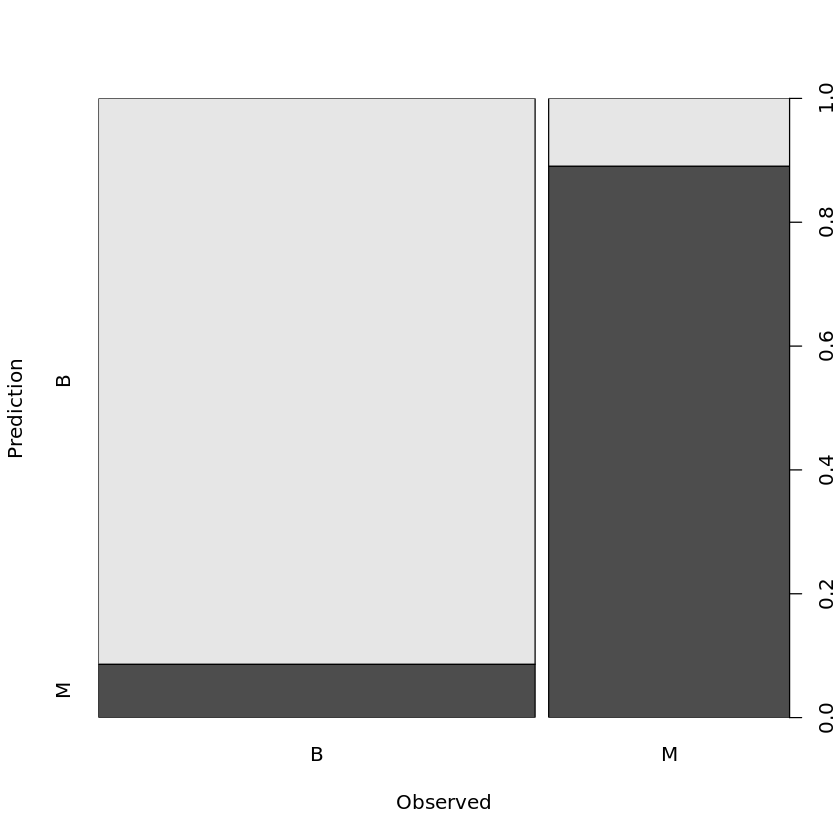

In [27]:
# 27- Test the model (initial and pruned) on test set
## make prediction
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

            CP nsplit rel error    xerror       xstd
1  0.695945946      0 1.0000000 1.0000000 0.06469979
2  0.040540541      1 0.3040541 0.3783784 0.04678209
3  0.013513514      3 0.2229730 0.3378378 0.04460138
4  0.011261261      4 0.2094595 0.2972973 0.04220845
5  0.010135135      7 0.1756757 0.2905405 0.04178648
6  0.003378378      9 0.1554054 0.2567568 0.03956479
7  0.000000000     11 0.1486486 0.2837838 0.04135737
8 -1.000000000     18 0.1486486 0.2837838 0.04135737


   
      B   M
  B 237  18
  M   4 130

                 
BreastCancer_pred   B   M
                B 108  10
                M   8  54

6 
6

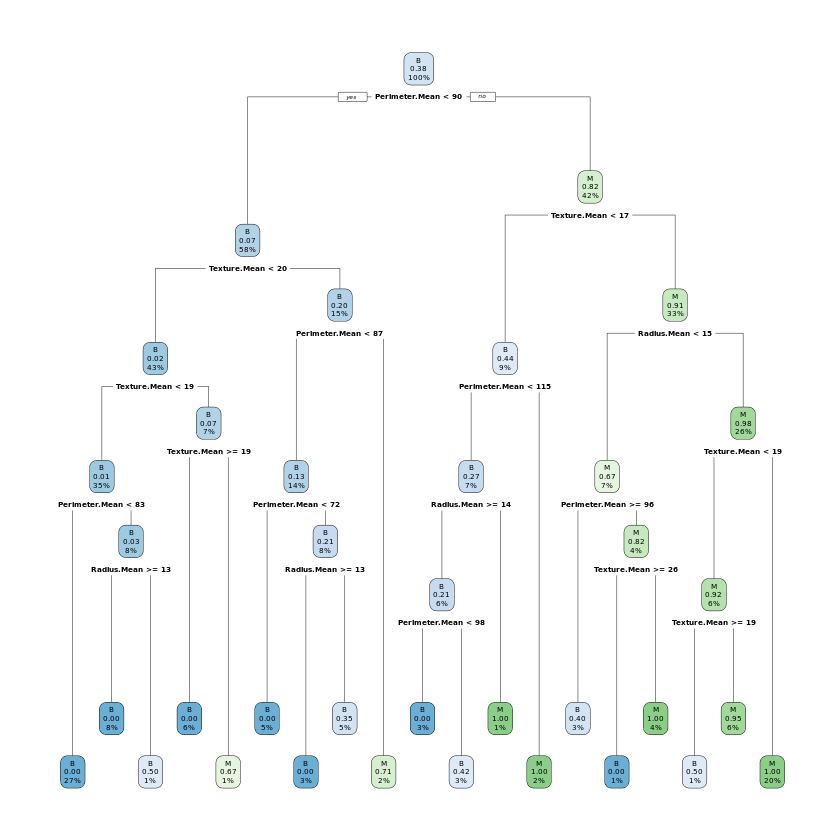

   
      B   M
  B 237  19
  M   4 129

                 
BreastCancer_pred   B   M
                B 108  10
                M   8  54

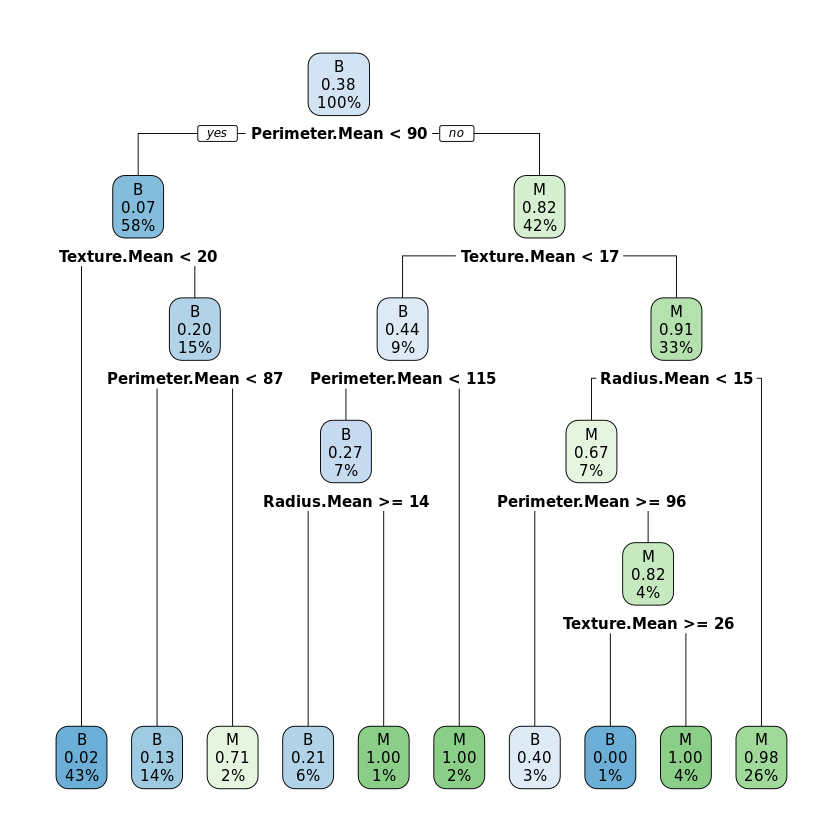

In [28]:
# 28- Construire un nouveau modèle avec 3 mêmes paramètres (Radius.Mean, Texture.Mean, Perimeter.Mean) mais avec minsplit=15, minbucket=2 et maxdepth=5
myFormula <- Diagnosis ~ Radius.Mean + Texture.Mean + Perimeter.Mean

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 15,
                                minbucket = 2,
                                maxdepth = 5,
                                cp = -1)

print(breastCancerData.model$cptable)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)
rpart.plot(breastCancerData.model)
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)

#simplifier ce modèle
opt <- which.min(breastCancerData.model$cptable[, "xerror"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
rpart.plot(breastCancerData.pruned.model)
table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)
rpart.plot(breastCancerData.pruned.model)
BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)


   
      B   M
  B 230  30
  M  11 118

                 
BreastCancer_pred   B   M
                B 107   8
                M   9  56

2 
2

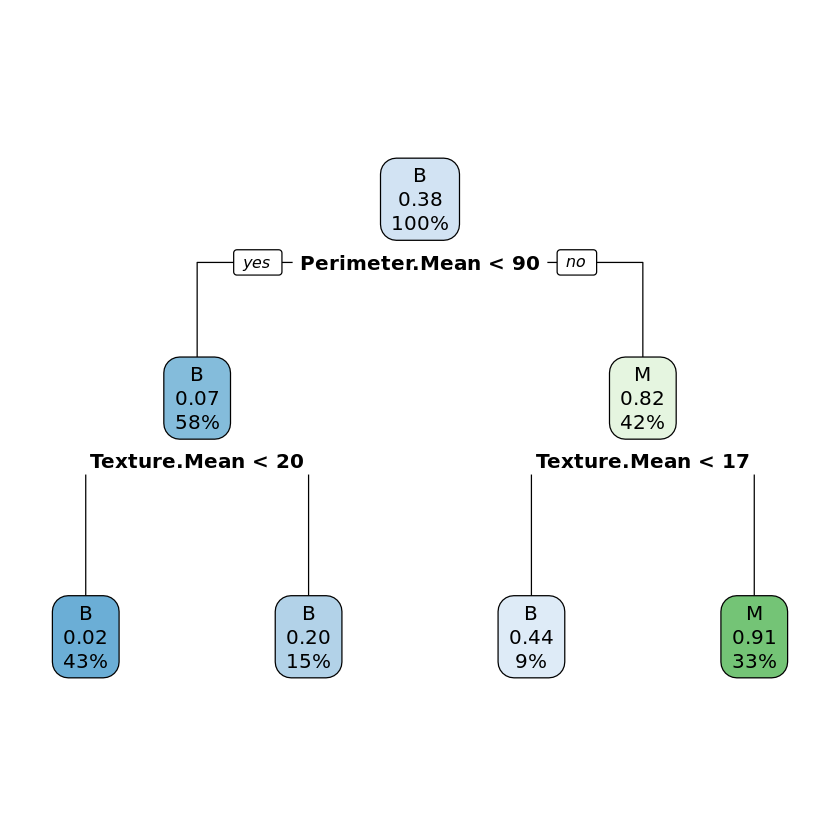

   
      B   M
  B 211  15
  M  30 133

                 
BreastCancer_pred  B  M
                B 98  8
                M 18 56

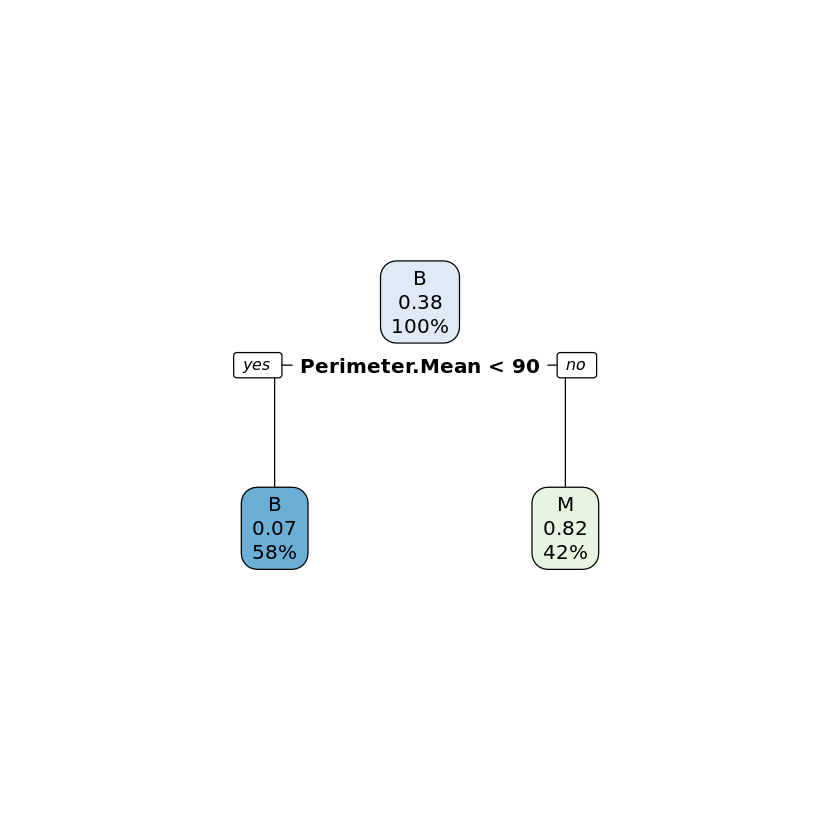

In [35]:
# 29- Recommencer avec minsplit=5, minbucket=1 et maxdepth=2
myFormula <- Diagnosis ~ Radius.Mean + Texture.Mean + Perimeter.Mean

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 5,
                                minbucket = 1,
                                maxdepth = 2,
                                cp = -1)

table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)
# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
rpart.plot(breastCancerData.model)
 
#simplifier ce modèle
opt <- which.min(breastCancerData.model$cptable[, "xerror"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
rpart.plot(breastCancerData.pruned.model)
table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)
rpart.plot(breastCancerData.pruned.model)
# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)



            CP nsplit rel error    xerror       xstd
1  0.797297297      0 1.0000000 1.0000000 0.06469979
2  0.037162162      1 0.2027027 0.2702703 0.04047680
3  0.010135135      3 0.1283784 0.2364865 0.03813284
4  0.006756757      5 0.1081081 0.2229730 0.03713175
5  0.000000000      6 0.1013514 0.2229730 0.03713175
6 -1.000000000      7 0.1013514 0.2229730 0.03713175


   
      B   M
  B 239  13
  M   2 135

                 
BreastCancer_pred   B   M
                B 112   8
                M   4  56

4 
4

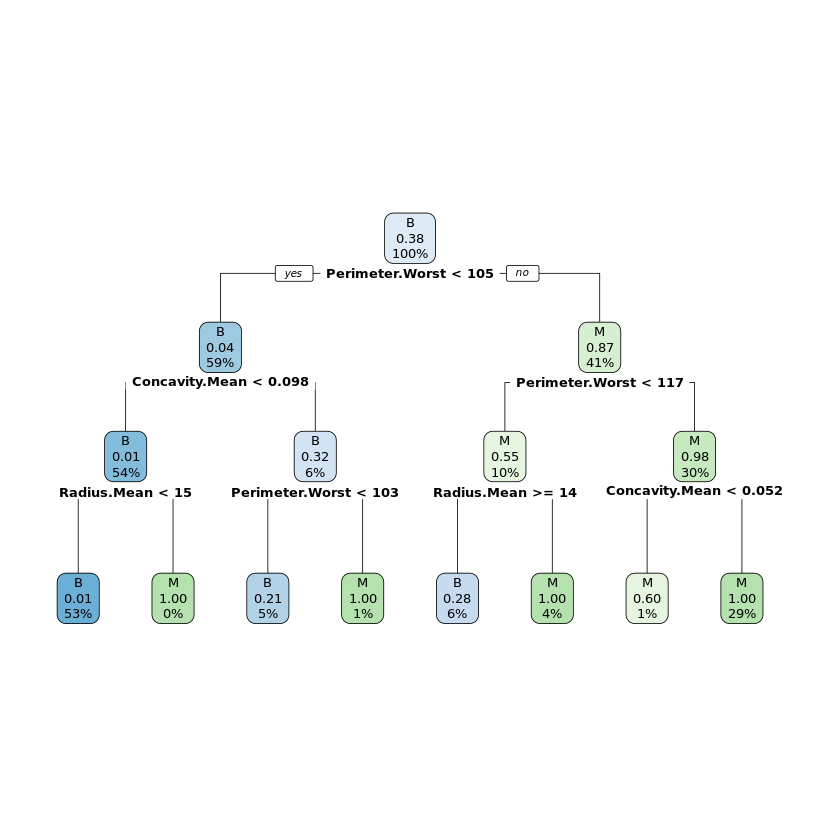

   
      B   M
  B 239  14
  M   2 134

                 
BreastCancer_pred   B   M
                B 113   8
                M   3  56

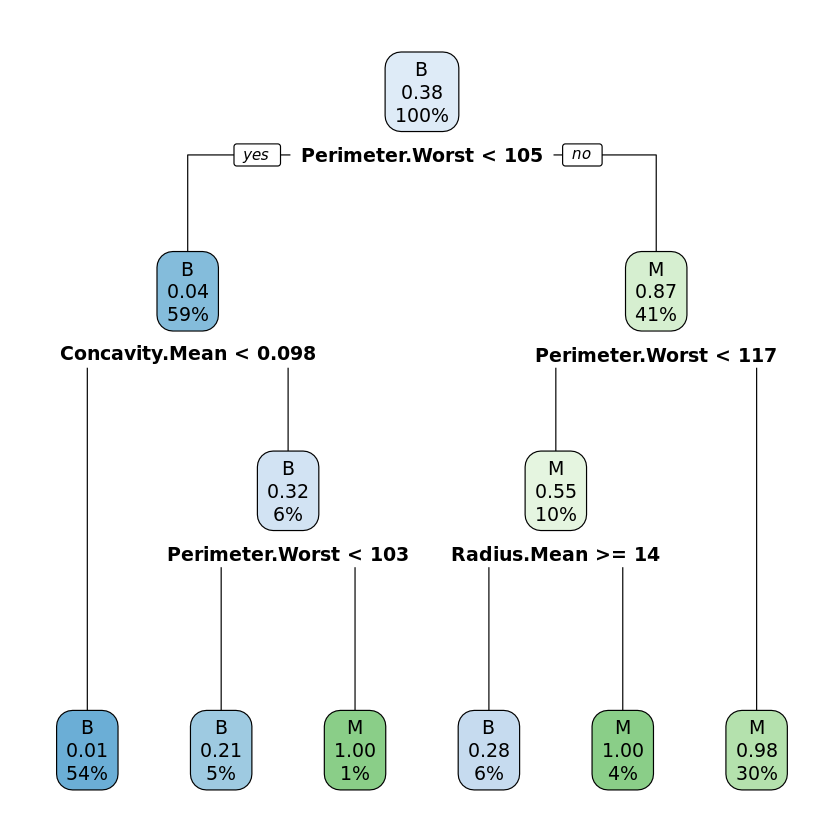

In [30]:
# 30- Construire un modèle avec 3 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3
myFormula <- Diagnosis ~ Radius.Mean + Concavity.Mean + Perimeter.Worst

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively (the larger its value, the more probable to apply pruning to the tree)


print(breastCancerData.model$cptable)
rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)

# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)

#simplifier le modèle
opt <- which.min(breastCancerData.model$cptable[, "xerror"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
rpart.plot(breastCancerData.pruned.model)
table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)
rpart.plot(breastCancerData.pruned.model)

# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)



            CP nsplit  rel error    xerror       xstd
1  0.797297297      0 1.00000000 1.0000000 0.06469979
2  0.037162162      1 0.20270270 0.2905405 0.04178648
3  0.016891892      3 0.12837838 0.3108108 0.04303179
4  0.006756757      5 0.09459459 0.2702703 0.04047680
5 -1.000000000      7 0.08108108 0.2702703 0.04047680


   
      B   M
  B 239  10
  M   2 138

                 
BreastCancer_pred   B   M
                B 112   9
                M   4  55

4 
4

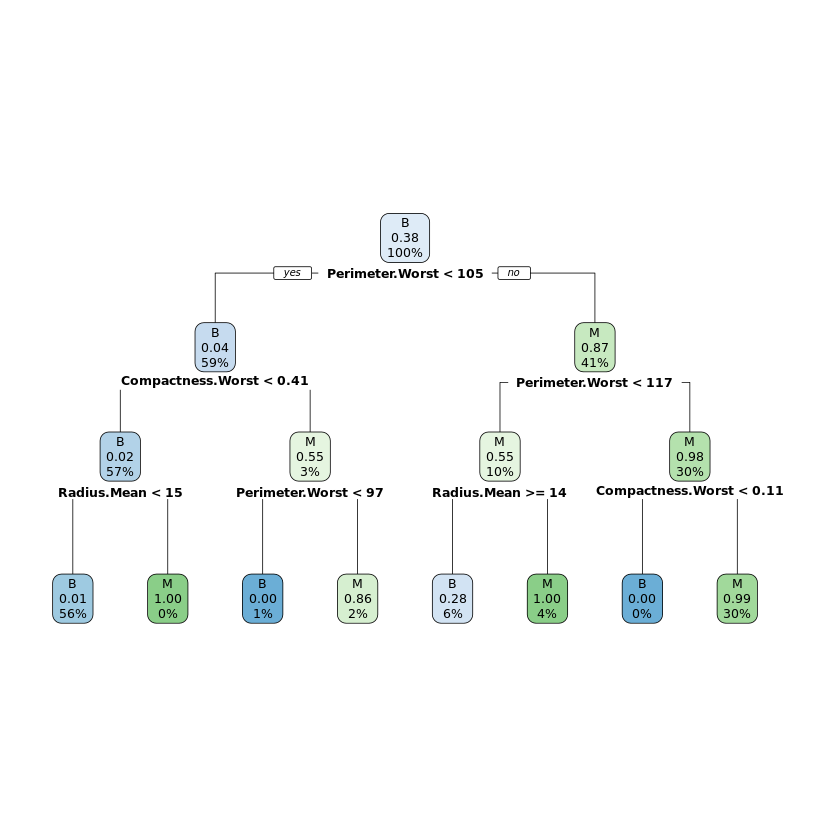

   
      B   M
  B 238  11
  M   3 137

                 
BreastCancer_pred   B   M
                B 113   9
                M   3  55

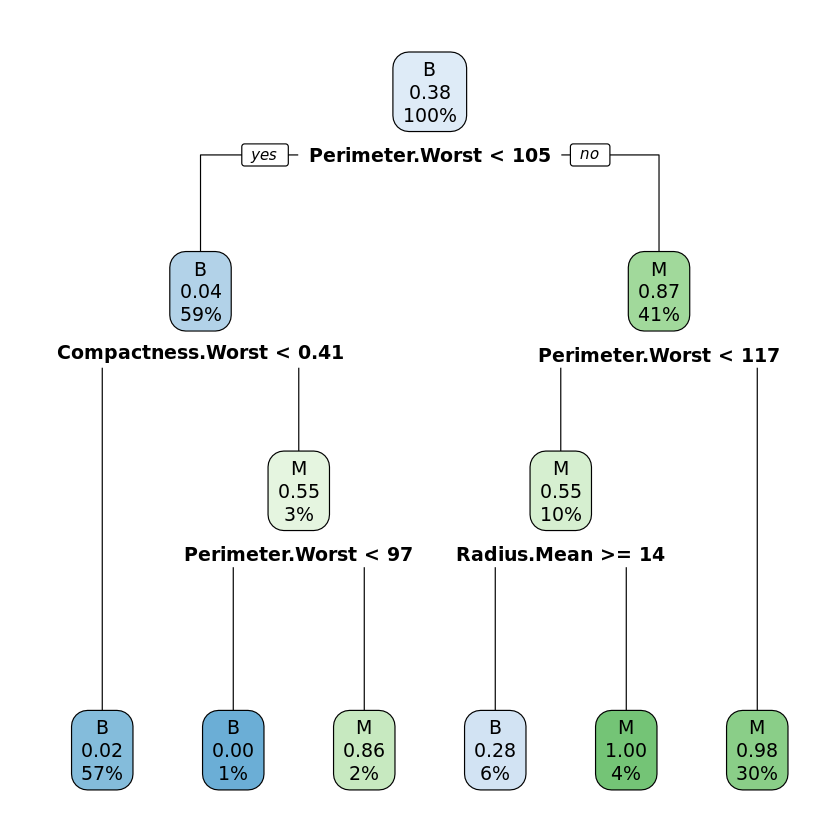

In [31]:
# 31- Construire un modèle avec 4 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3
myFormula <- Diagnosis ~ Radius.Mean + Concavity.Mean + Perimeter.Worst + Compactness.Worst

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively (the larger its value, the more probable to apply pruning to the tree)


print(breastCancerData.model$cptable)
rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)
# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)

#simplifier le modèle
opt <- which.min(breastCancerData.model$cptable[, "xerror"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
rpart.plot(breastCancerData.pruned.model)
table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)
rpart.plot(breastCancerData.pruned.model)
# Le tester sur le set test 
BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)



<div class="alert alert-warning"> 
    3ème quizz sur le moodle : est-ce que le modèle avec les 3 paramètres (Radius.Mean, Concavity.Mean et Perimeter.Worst) est plus performant (ie donne moins d'erreurs) sur le set test que le modèle avec 4 paramêtres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst) ? 
</div>

## IV - Random Forest

<div class="alert alert-block alert-danger">
    <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 1 minute) de calcul. Patience patience ...
</div>

In [32]:
# 32- Create a random forest model on the training dataset

model_rf <- caret::train(Diagnosis ~ .,
                         data = breastCancerData.train,
                         method = "rf",
                         preProcess = c("scale", "center"),
                         trControl = trainControl(method = "repeatedcv", 
                                                  number = 5, 
                                                  repeats = 3, 
                                                  verboseIter = FALSE))

model_rf
model_rf$finalModel$confusion

Random Forest 

389 samples
 30 predictor
  2 classes: 'B', 'M' 

Pre-processing: scaled (30), centered (30) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 311, 311, 311, 311, 312, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9494713  0.8928431
  16    0.9477397  0.8897276
  30    0.9477286  0.8896065

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

,B,M,class.error
B,234,7,0.02904564
M,10,138,0.06756757


Perimeter.Worst              Area.Worst    Concave.Points.Worst 
              18.824079               18.780887               14.568978 
           Radius.Worst          Perimeter.Mean          Concavity.Mean 
              14.355624               11.461723               11.364185 
    Concave.Points.Mean                 Area.SE             Radius.Mean 
              10.577969                9.148804                8.267589 
              Area.Mean         Concavity.Worst        Compactness.Mean 
               8.078816                6.614612                5.441310 
              Radius.SE       Compactness.Worst            Perimeter.SE 
               5.074093                4.161297                4.027148 
          Texture.Worst            Texture.Mean            Concavity.SE 
               3.905722                3.379818                2.957287 
       Smoothness.Worst          Symmetry.Worst       Concave.Points.SE 
               2.894234                2.566185                2.363046 
Fractal.Dimension.Worst         Smoothness.Mean  Fractal.Dimension.Mean 
               2.108268                2.105946                1.841838 
         Compactness.SE             Symmetry.SE           Symmetry.Mean 
               1.571383                1.370017                1.335129 
   Fractal.Dimension.SE           Smoothness.SE              Texture.SE 
               1.296372                1.126837                1.121930

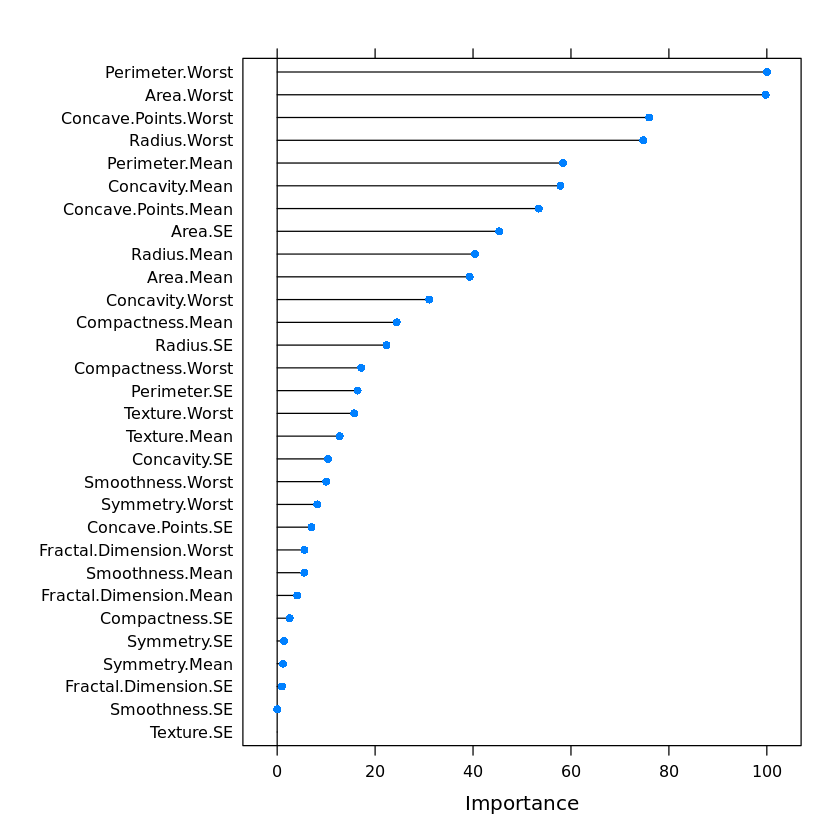

In [33]:
# 33- plot parameters importance
imp <- model_rf$finalModel$importance
imp[order(imp, decreasing = TRUE), ]

# estimate variable importance
importance <- varImp(model_rf, scale = TRUE)
plot(importance)

In [34]:
# 34- predicting test data
confusionMatrix(predict(model_rf, breastCancerData.test), as.factor(breastCancerData.test$Diagnosis))

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 114   6
         M   2  58
                                          
               Accuracy : 0.9556          
                 95% CI : (0.9143, 0.9806)
    No Information Rate : 0.6444          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9016          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9828          
            Specificity : 0.9062          
         Pos Pred Value : 0.9500          
         Neg Pred Value : 0.9667          
             Prevalence : 0.6444          
         Detection Rate : 0.6333          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.9445          
                                          
       'Positive' Class : B               
                              

<div class="alert alert-warning"> 
    4ème (et dernier) quiz sur le moodle : est-ce que le modèle utilisant random forest est plus performant que les différents modèles de Decision tree sur le set test ? 
</div>

***
***
## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>